# Generation of Dataset 1

In [1]:
import numpy as np
from numpy.linalg import matrix_rank as rank

A = np.random.normal(0,1,(3,2))
print("Matrix A:")
print(A)
print("Rank of matrix A is:",np.linalg.matrix_rank(A))
v = np.random.normal(0,1,(2,1))
X = np.matmul(A,v)


for i in range(0,499):
    v = np.random.normal(0,1,(2,1))
    xi = np.matmul(A,v)
    X = np.concatenate((X,xi),1)
    
print("Shape of matrix X:", np.shape(X))

V = np.random.normal(0,1,(2,500))
X2 = np.matmul(A,V)
print("Shape of matrix X2:", np.shape(X2))

#print(rank(X2))

U, S, VH = np.linalg.svd(X) #S returned as vector of eigenvalues
print("Left singular vectors:")
print(U)
XXT = np.matmul(X, np.transpose(X))
eigen, ev = np.linalg.eig(XXT)
print("Eigenvectors:")
print(ev)


print("Singular Values from X")
print(S)

print("Eigenvalues of XXT:")
print(eigen)

print("Difference of square of singular values and eigenvalues:")
temp = np.square(S)-eigen
print(temp)

print("Sum of squares of singular values of X:")
print(np.sum(np.square(S)))



Matrix A:
[[-0.77128655  0.62589886]
 [-0.52362734  0.24024305]
 [-0.43443268  0.43629858]]
Rank of matrix A is: 2
Shape of matrix X: (3, 500)
Shape of matrix X2: (3, 500)
Left singular vectors:
[[-0.76866626  0.15119089 -0.62152513]
 [-0.42764595 -0.84405238  0.32356533]
 [-0.47567964  0.51450646  0.71345076]]
Eigenvectors:
[[-0.76866626 -0.62152513  0.15119089]
 [-0.42764595  0.32356533 -0.84405238]
 [-0.47567964  0.71345076  0.51450646]]
Singular Values from X
[2.88325738e+01 3.63442994e+00 2.96978867e-15]
Eigenvalues of XXT:
[ 8.31317309e+02 -1.02997889e-13  1.32090810e+01]
Difference of square of singular values and eigenvalues:
[  0.          13.20908097 -13.20908097]
Sum of squares of singular values of X:
844.5263904048317


The singular values are found to be $(4.21458535e+01 1.59854630e+01 1.72370170e-15) \approx (4.215, 1.599, 0)$. The first two values are our nonzero singular values. The third number is also nonzero. However, the number is on the order of $10^{-15}$, which makes it effectively zero. This occurence is likely due to how Python is handeling float numbers and causing the "zero" found through the svd to not be exactly $0$. 

The relationship between the left singular vectors of X 

## PCA of Dataset #1

Only 2 principal components are needed since there are only 2 singular values of X that are effectively nonzero. The third vector is negligible since the third singular value is much smaller than the other two. As such, the third left singular vector would not affect X substantially and would simply be noise. 

Since the vector $V$ was determined by a Gaussian distribution with mean of $0$, mean centering would not be necessary. The three components would then have values close to zero

In [2]:
m = np.mean(X,1)
m = m.reshape(3,1)
print(m)

[[-0.01768839]
 [-0.00351133]
 [-0.01381684]]


In [3]:
Xcent = X - m
covX = np.cov(Xcent)
vals, vects = np.linalg.eig(covX)
inds = vals.argsort()[-2:][::-1]

print("eigenvalues")
print(vals)
print("eigenvectors")
print(vects)

u1 = np.reshape(vects[:,inds[0]],(3,1))
u2 = np.reshape(vects[:,inds[1]],(3,1))
U = np.concatenate((u1,u2),1)
print("Matrix U")
print(U)

eigenvalues
[ 1.66549602e+00 -6.04150826e-17  2.64244930e-02]
eigenvectors
[[-0.7686526  -0.62152513  0.15126033]
 [-0.4277222   0.32356533 -0.84401374]
 [-0.47563316  0.71345076  0.51454943]]
Matrix U
[[-0.7686526   0.15126033]
 [-0.4277222  -0.84401374]
 [-0.47563316  0.51454943]]


In [4]:
Utemp = np.matmul(U,U.T)
Xapprox = np.matmul(Utemp,X)

error = np.sum(np.square(X - Xapprox))
print("error")
print(error)

error
3.435937423438842e-28


In [5]:
U1 = vects[:,inds[0]]
U1 = U1.reshape(3,1)
Xapprox2 = np.matmul(U1,np.matmul(U1.T,X))
error2 = np.sum(np.square(X - Xapprox2))
print("error")
print(error2)

secondSV = np.sort(S)[-2]
print("Square of second largest Singular Value")
print(secondSV**2)

print("Difference of squared SV and error")
print(error2 - secondSV**2)

error
13.209087648149684
Square of second largest Singular Value
13.209080971076453
Difference of squared SV and error
6.677073230321184e-06


Text(0.5,0.92,'Reconstructed data')

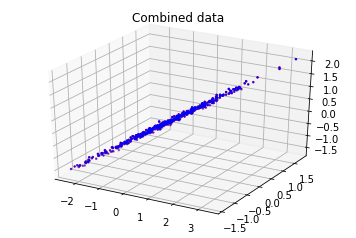

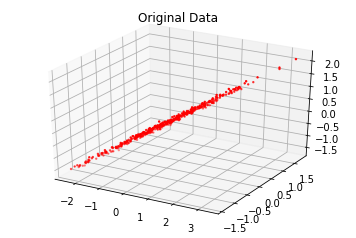

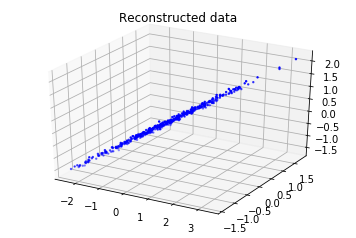

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[0,:],X[1,:],X[2,:],s = 2, c = 'red')
ax.scatter(Xapprox[0,:],Xapprox[1,:],Xapprox[2,:],s = 2, c = 'blue')
ax.set_title('Combined data')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')


ax2.scatter(X[0,:],X[1,:],X[2,:],s = 2, c = 'red')
ax2.set_title('Original Data')


fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')


ax3.scatter(Xapprox[0,:],Xapprox[1,:],Xapprox[2,:],s = 2, c = 'blue')
ax3.set_title('Reconstructed data')


# Generation of Dataset 2

In [10]:
c = np.random.normal(0,3**.5,(3,1))
v = np.random.normal(0,1,(2,500))
A = A #from previous part
X = np.matmul(A,v) + c
print("Rank of Matrix X:", np.linalg.matrix_rank(X))


covX = np.cov(X)
vals, vects = np.linalg.eig(covX)
inds = vals.argsort()[-2:][::-1]

u1 = np.reshape(vects[:,inds[0]],(3,1))
u2 = np.reshape(vects[:,inds[1]],(3,1))
U = np.concatenate((u1,u2),1)
print("Matrix U")
print(U)


Utemp = np.matmul(U,U.T)
Xapprox = np.matmul(Utemp,X)

error = np.sum(np.square(X - Xapprox))
print("error")
print(error)


m = np.mean(X,1).reshape(3,1)
print('Calculated averages m')
print(m)

Xcent = X - m
covX = np.cov(Xcent)
inds = vals.argsort()[-2:][::-1]

u1 = np.reshape(vects[:,inds[0]],(3,1))
u2 = np.reshape(vects[:,inds[1]],(3,1))
U = np.concatenate((u1,u2),1)
print("Matrix U with centered X")
print(U)

Utemp = np.matmul(U,U.T)
Xapprox = np.matmul(Utemp,Xcent)

error = np.sum(np.square(Xcent - Xapprox))
print("error")
print(error)

Rank of Matrix X: 3
Matrix U
[[ 0.76699773  0.15943959]
 [ 0.43668854 -0.83940967]
 [ 0.47012509  0.51958678]]
error
365.21616892268617
Calculated averages m
[[ 0.22301056]
 [ 1.02442277]
 [-1.46823639]]
Matrix U with centered X
[[ 0.76699773  0.15943959]
 [ 0.43668854 -0.83940967]
 [ 0.47012509  0.51958678]]
error
2.3447506672756264e-29


From the above, it is apparent that by centering the data, the error decreases significantly to approximately $0$.

# Generation of Dataset 3

(3, 500)
(3, 500)
The rank of the normalized data matrix is: 3
The singular values are: [20.98705825  7.61971539  1.21791759]


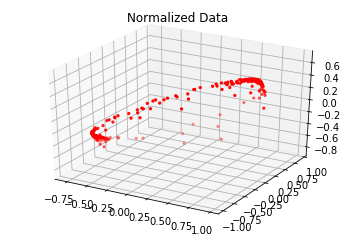

In [15]:
n = np.random.normal(0,.01**.5,(3,1))
v = np.random.normal(0,1,(2,500))
A = A #from previous part
X = np.matmul(A,v) + n
Xnorm = []
print(np.shape(X))

for i in X.T:
    temp = np.sum(np.square(i))**.5
    tempCol = np.divide(i,temp)
    Xnorm.append(tempCol)

Xnorm = np.array(Xnorm).T
print(np.shape(Xnorm))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(Xnorm[0,:],Xnorm[1,:],Xnorm[2,:],s = 5, c = 'red')
ax.set_title('Normalized Data')

print("The rank of the normalized data matrix is:", np.linalg.matrix_rank(Xnorm))
u, s, v = np.linalg.svd(Xnorm)
print("The singular values are:", s)

Matrix U
[[ 0.76826289  0.16219477]
 [ 0.43212634 -0.84509791]
 [ 0.47227001  0.50941376]]
error
1.563693718312769
Square of third SV
1.483323244777837
Difference of error and square of SV
0.08037047353493199


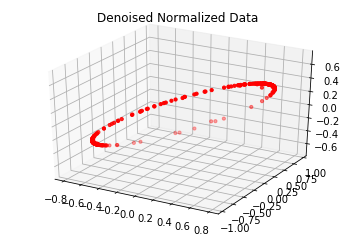

In [16]:

covX = np.cov(Xnorm)
vals, vects = np.linalg.eig(covX)
inds = vals.argsort()[-2:][::-1]

u1 = np.reshape(vects[:,inds[0]],(3,1))
u2 = np.reshape(vects[:,inds[1]],(3,1))
U = np.concatenate((u1,u2),1)
print("Matrix U")
print(U)

XR = np.matmul(U,np.matmul(U.T,Xnorm))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')


ax2.scatter(XR[0,:],XR[1,:],XR[2,:],s = 10, c = 'red')
ax2.set_title('Denoised Normalized Data')


thirdSV = np.sort(s)[-3]
error = np.sum(np.square(Xnorm - XR))
print("error")
print(error)
print("Square of third SV")
print(thirdSV**2)
print("Difference of error and square of SV")
print(error-thirdSV**2)


# Real Data

(64, 178)
(178,)
(64,)


Text(0.5,1,'Mean image')

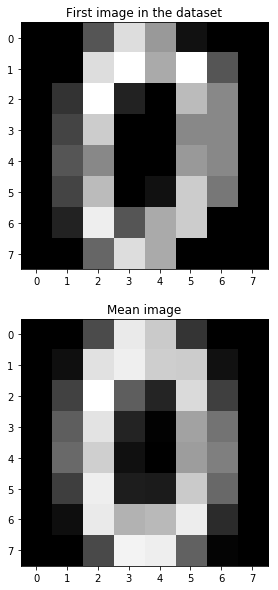

In [18]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)

images = images.T
print(np.shape(images))
print(np.shape(labels))

meanImage = np.mean(images,1)
print(np.shape(meanImage))
fig, axes = plt.subplots(2, 1,figsize=(5,10))
axes[0].imshow(images[:,0].reshape(8,8), cmap = 'gray')
axes[0].set_title('First image in the dataset')
axes[1].imshow(meanImage.reshape(8,8), cmap = 'gray')
axes[1].set_title('Mean image')


The smallest k that satisfies the property is: 55
Shape of matrix U
(64, 55)


Text(0.5,1,'First Principal Component')

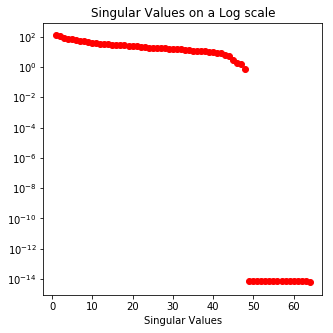

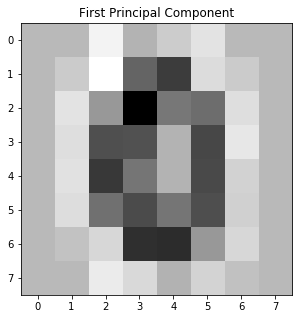

In [19]:
Xcent = images-meanImage.reshape(64,1)
u, s, v = np.linalg.svd(Xcent)

fig, ax = plt.subplots(1, 1,figsize=(5,5))
ax.plot(range(1,65),s,'ro')
ax.set_yscale("log")
ax.set_xlabel('Singular Values')
ax.set_title('Singular Values on a Log scale')
norm = np.sum(np.square(Xcent))

for k in range(1,len(s)+1):
    temp = np.sum(np.square(Xcent[0:k]))
    if(temp/norm >= 0.90):
        break

print("The smallest k that satisfies the property is:", k)

covX = np.cov(Xcent)
vals, vects = np.linalg.eig(covX)
inds = vals.argsort()[-k:][::-1]

U = np.reshape(vects[:,inds[0]],(64,1))

for i in inds[1::]:
    u2 = np.reshape(vects[:,i],(64,1))
    U = np.concatenate((U,u2),1)

print("Shape of matrix U")
print(np.shape(U))
fig, ax = plt.subplots(1, 1,figsize=(5,5))
ax.imshow(U[:,0].reshape(8,8),cmap='gray')
ax.set_title('First Principal Component')

(3, 178)
error
36050.010605737116
Sum of the squares of the rest of the unused singular values
36050.01060573713


Text(0.5,1,'Reconstructed First Image')

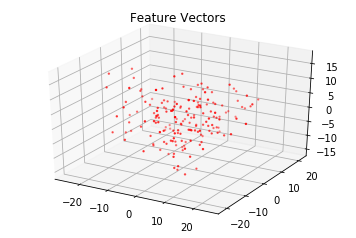

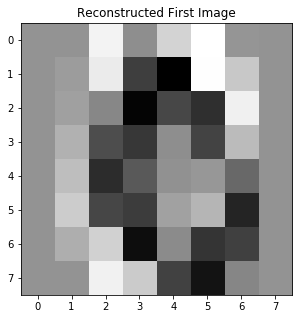

In [20]:
U3 = U[:,0:3]
xF = np.matmul(U3.T,Xcent)

print(np.shape(xF))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(xF[0,:],xF[1,:],xF[2,:],s = 2, c = 'red')
ax.set_title('Feature Vectors')


XRec = np.matmul(U3,xF)
error = np.sum(np.square(Xcent - XRec))
print("error")
print(error)

print("Sum of the squares of the rest of the unused singular values")
print(np.sum(np.square(s[3::])))


fig, ax = plt.subplots(1, 1,figsize=(5,5))
ax.imshow(XRec[:,0].reshape(8,8),cmap='gray')
ax.set_title("Reconstructed First Image")
